# Analyzing borrowers’ risk of defaulting


My task is to prepare a report for the credit department of the bank. I need to find out if the client's marital status and the number of children affect the non-payment of the loan.\
I was lucky, I don’t need to collect data myself, the bank provided some data on the creditworthiness of customers collected by its employees.\
My project will include the following steps:
- analysis of gaps and duplicates.
- deciding which incorrect lines to keep and which can be deleted.
- filling in the value in the missing cells of the table.
- remove duplicates.
- creation of categories to simplify the testing of hypotheses.
- draw conclusions for each hypothesis.
- general conclusion.

Main python libraries used:
- Pandas
- Numpy
- Matplotlib
- Seaborn

## Open the data file and have a look at the general information. 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns




# Load the data

path_h = "/Users/victo/Downloads/credit_scoring_eng.csv"
path = '/datasets/credit_scoring_eng.csv'

try:
    df = pd.read_csv(path_h, sep = ',')
except:
    df = pd.read_csv(path, sep = ',')

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan


In [2]:
# let's see how many rows and columns our dataset has

print(df.shape)

(21525, 12)


In [3]:
# let's print the first 5 rows

df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


At first sight, I see really weird data in column **days_employed**:
- negative values
- the values floating
- in row index 4 has a value - of 340266 days, which means about 932 years

Also, I see the same values typing differently in column **education**. \
And I don't understand why **total_income** has floated, not integer format.

In [4]:
# get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Not bad, we have just 2 columns with missing values: **days_employed** and **total_income**. \
Also, both columns have an equal quantity of missing data, and only they have a floating data type. \
The last one, I guess, is the result of calculation, not inputting. 

Let's continue, it's getting interesting.

In [5]:
# let's look in the filtered table at the the first column with missing data

df[df.days_employed.isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Missing values look symmetrical, at least in the rows that are visible. \
I'm going to filter the data by two values ( **days_employed** and **total_income**)  at once, and check if the size of this sample matches the number of missing values in the general sample.

In [6]:
# let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
len(df[(df.days_employed.isnull()) & (df.total_income.isnull())])


2174

In [7]:
# let's to make additional check, and count values in column total_incom if the table is filtered by 
# a null value in column days_employed 
df[df.days_employed.isnull()]['total_income'].value_counts()

Series([], Name: total_income, dtype: int64)

**Intermediate conclusion**

The sample size matched the number of missing values in the general sample, and we can safely say that the missing values in the two columns are semetric.

The size of the missing values is 10%, and by simply removing them we can skew the final result. Therefore, I will look for a method to fill in the missing values.
To do this, you must first check whether the missing values are related to a specific characteristic of the client. 

When issuing a loan to a client, it is important to understand how he will repay it. Does he have a job or his own business?
With the study of missing data and this characteristic, I will begin. And then I'll check the connection with the rest of the characteristics.

In [8]:
# Let's start checking whether the missing values are random.
# Making a set
df_n = df[df.days_employed.isnull()]


In [9]:
# Checking distribution

df_n.income_type.value_counts(normalize = True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

The distribution in this sample showed that the data were missing in the majority of:

- employee 51%
- businesses 23%
- retiree 18%.

Now, let's look at the distribution in the general sample.

In [10]:
# checking the distribution in the whole dataset
df.income_type.value_counts(normalize = True)


employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
entrepreneur                   0.000093
unemployed                     0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64

In [11]:
# let's make a table for more comfortable comparison of distribution
df_hist = pd.concat([df_n.income_type.value_counts(normalize = True), df.income_type.value_counts(normalize = True)], axis=1)
df_hist.reset_index(inplace = True)

df_hist.columns.values[1] = 'income' # changed the name of columns with data from filtered df
df_hist

,index,income,income_type
0,employee,0.508280,0.516562
1,business,0.233671,0.236237
2,retiree,0.189972,0.179141
3,civil servant,0.067617,0.067782
4,entrepreneur,0.000460,0.000093
5,unemployed,NaN,0.000093
6,paternity / maternity leave,NaN,0.000046
7,student,NaN,0.000046


**Intermediate conclusion**

It can be seen that the distributions in the general sample and the filtered sample are very close. This means that the data was lost randomly.

But, for greater certainty, we will check the connection of the remaining characteristics with the missing data. Perhaps we can find some connections.


In [12]:
# check for other reasons and patterns that could lead to missing values
for i in df:
    print(df[df.days_employed.isnull()][i].value_counts())
    print('-------------')


 0     1439
 1      475
 2      204
 3       36
 20       9
 4        7
-1        3
 5        1
Name: children, dtype: int64
-------------
Series([], Name: days_employed, dtype: int64)
-------------
34    69
40    66
31    65
42    65
35    64
36    63
47    59
41    59
30    58
28    57
57    56
58    56
54    55
38    54
56    54
37    53
52    53
39    51
33    51
50    51
51    50
45    50
49    50
29    50
43    50
46    48
55    48
48    46
53    44
44    44
60    39
61    38
62    38
64    37
32    37
27    36
23    36
26    35
59    34
63    29
25    23
24    21
66    20
65    20
21    18
22    17
67    16
0     10
68     9
69     5
20     5
71     5
70     3
72     2
19     1
73     1
Name: dob_years, dtype: int64
-------------
secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
S

**Conclusions**

I did not see any relationship between the missing data and characteristics. We can only conclude that in the sample with missing data, the profile of the most common customer looked like this:

- 30-40 years old
- works as an employee and businessman
- 2nd education
- married
- no problems with repayment of the loan

So, since there is no connection, the data is lost by accident. I think this happened during the data transfer, but we need to talk to the data source to find out more precisely.

To correctly restore the data, I will use the most common data dependent on age, education, and type of employment.

The characteristic age has many meanings, therefore, to simplify the calculations, we will divide the data into categories.
For this, I prefer to use the next age classification:

- up to 25 years
- from 26 to 35 years
- from 36 to 45 years
- from 46 to 55 years
- from 56 to 65 years
- from 66 years old 

**Important note.** To avoid errors when filling in missing data, you need to check the dependent columns for duplicates and incorrect values.

Therefore, I will first check all the characteristics.

## Data transformation



1. Removing duplicates and fixing information if required.

In [13]:
# let's see all values in education column to check if and what spellings will need to be fixed
df.education.value_counts()

# Checking duplicates
df.duplicated().sum()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

54

In [14]:
# fix the registers if required
df.education = df.education.str.lower()

In [15]:
# checking all the values in the column to make sure we fixed them
df.education.value_counts()

# Checking duplicates again
df.duplicated().sum()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

71

It should be noted that the number of duplicates increased after the column transformation. So we are on the right track. Check the rest of the characteristics and then remove all duplicates.

Let's check the data the `children` column.

In [16]:
# let's see the distribution of values in the `children` column
df.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

I see strange values for the number of children: 20 and -1.
I think that this is a mechanical error when entering information, so I will simply replace the values with 2 and 1, respectively.

In [17]:
# lets replace the wrong values

df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace(-1, 0)

In [18]:
# checking the `children` column again to make sure it's all fixed

df.children.value_counts()

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Let's check the data in the `days_employed` column. 

In [19]:
# find problematic data in `days_employed`, and calculate the percentage
df[df['days_employed'] <0].shape[0]

df[df['days_employed'] <0].shape[0]/df.shape[0]

15906

0.7389547038327526

So, we have about 74% of negative values, where they should not be at all. Without a doubt, this is a technical error. Most likely this is a settlement column, and negative values ​​appeared when the start date of work and the date of calculation were mixed up in the formula.\
!But\
We also have a problem with supposedly normal values. They are insanely large. The minimum value is 328728 days, which is about 900 years...\
These are not days, but hours. And then, if we first correct 328728 by 24 hours, and then divide by 365 days, we get 37.5 years, which is quite realistic.\
So let's do it.

In [20]:
# let's sorting the data and look for min values of 'days_employed'
df[df['days_employed'] > 0].sort_values(by = 'days_employed', ascending = True).head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20444,0,328728.720605,72,secondary education,1,widow / widower,2,F,retiree,0,15443.094,purchase of the house for my family
9328,2,328734.923996,41,bachelor's degree,0,married,0,M,retiree,0,20319.600,transactions with my real estate
17782,0,328771.341387,56,secondary education,1,married,0,F,retiree,0,10983.688,transactions with commercial real estate
14783,0,328795.726728,62,bachelor's degree,0,married,0,F,retiree,0,12790.431,buying my own car
7229,1,328827.345667,32,secondary education,1,civil partnership,1,F,retiree,0,19546.075,to have a wedding


In [21]:
# let's fixing wrong values

# making function for divide positive values of data
def calc_days(row):
    if row> 0:
        row = row / 24
        return row
    else:
        return row

# apply the function and replace the overestimated values
df['days_employed'] = df['days_employed'].apply(calc_days)

# to change the negative values apply the method .abs
df.days_employed = df.days_employed.abs()

In [22]:
# check the result - make sure it's fixed

df[df['days_employed'] <0].shape[0]

0

Let's now look at the client's age and whether there are any issues there.

In [23]:
# check the `dob_years` for suspicious values and count the percentage

import sidetable

df.stb.freq(['dob_years'], style=True)

,dob_years,count,percent,cumulative_count,cumulative_percent
0,35,617,2.87%,617,2.87%
1,40,609,2.83%,"1,226",5.70%
2,41,607,2.82%,"1,833",8.52%
3,34,603,2.80%,"2,436",11.32%
4,38,598,2.78%,"3,034",14.10%
5,42,597,2.77%,"3,631",16.87%
6,33,581,2.70%,"4,212",19.57%
7,39,573,2.66%,"4,785",22.23%
8,31,560,2.60%,"5,345",24.83%
9,36,555,2.58%,"5,900",27.41%


The minimum value in the column turned out to be 0. This is an obvious mistake of the performer who filled in the data.
I see that rows with this value are only 0.47%, so removing them won't significantly skew the result.
So let's do it.

In [24]:
# let's address the issues in the `dob_years` column
df.drop(df[df['dob_years'] == 0].index, inplace = True)

In [25]:
# check the result - make sure it's fixed
df.dob_years.value_counts().sort_index().head()

19     14
20     51
21    111
22    183
23    254
Name: dob_years, dtype: int64

Now let's check the `family_status` column.

In [26]:
# Let's see the values for the column

df.family_status.value_counts()

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

It's a miracle, but I saw no problem with the data in this column.

Now let's check the `gender` column.

In [27]:
# let's see the values in the column
df.gender.value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

In [28]:
# let's address the problematic values

df[df['gender'] == 'XNA']



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [29]:
# We have just one wrong value, so let's just delete him
df = df.loc[df['gender'] != 'XNA']

# check the result - make sure it's fixed
df.gender.value_counts()

F    14164
M     7259
Name: gender, dtype: int64

Now let's check the `income_type` column.

In [30]:
# Let's see the values in the column
df.income_type.value_counts()

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

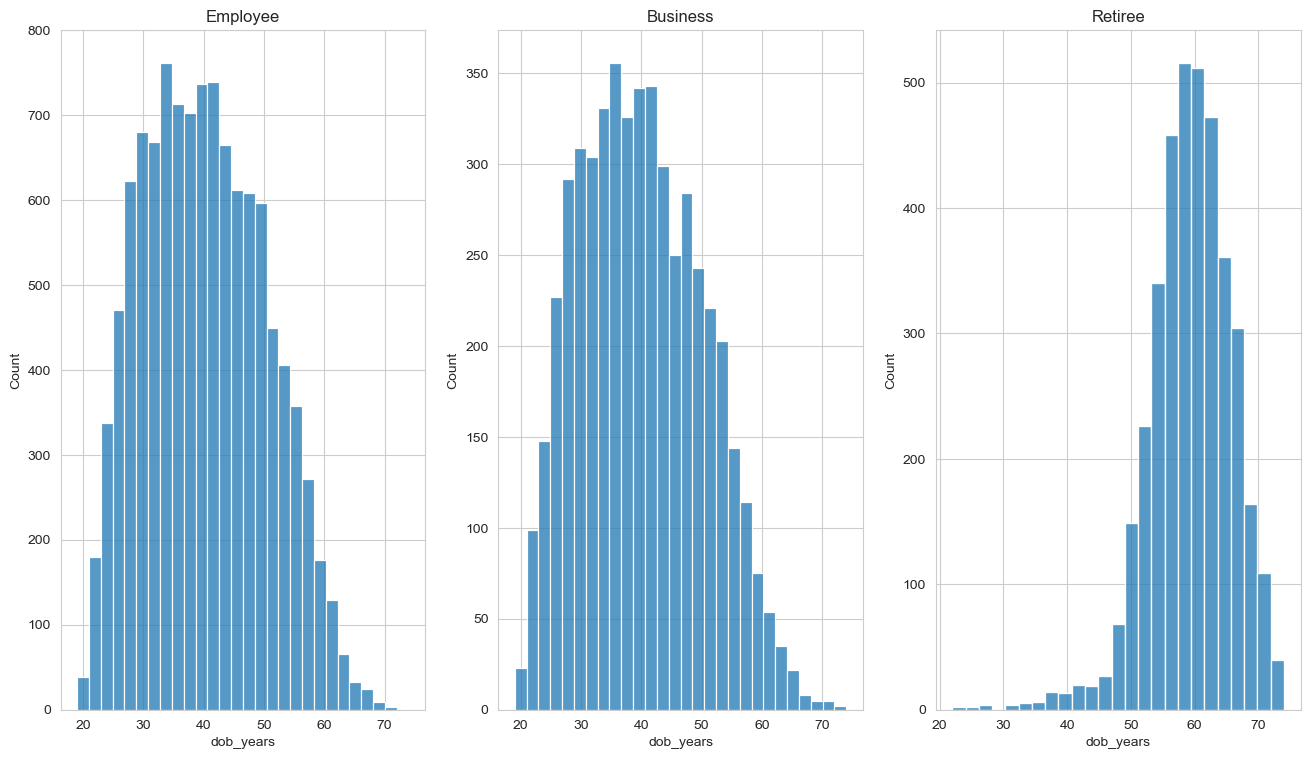

In [31]:
# we have 3 values that get more than 90%, let's check their distribution
# for this reason, let's build charts

sns.set_style("whitegrid")
figure(figsize=(16, 9), dpi=100)
plt.subplot(1, 3, 1)
sns.histplot(df[df['income_type'] == 'employee']['dob_years'], bins=28).set(title='Employee')
plt.subplot(1, 3, 2)
sns.histplot(df[df['income_type'] == 'business']['dob_years']).set(title='Business')
plt.subplot(1, 3, 3)
sns.histplot(df[df['income_type'] == 'retiree']['dob_years'], bins=25).set(title='Retiree')
plt.show();

In general, everything is beautiful. \
But retiree in the range from 20 to 55 years old are surprising. Perhaps this is how people indicated that they receive benefits from the state for some reason. It can be seen that there are not many of these values, and even if they are not, they will not significantly change the result.
So I decided not to do anything with this data.



Now let's see if we have any duplicates in our data. 

In [32]:
# Checking duplicates

df.duplicated().sum()

71

In [33]:
# Address the duplicates, if they exist
df = df.drop_duplicates().reset_index(drop = True)

In [34]:
# Last check whether we have any duplicates
df.duplicated().sum()

0

In [35]:
# Check the size of the dataset that you now have after your first manipulations with it
df.shape

(21352, 12)

Initially, the observation depth was 21525 lines, and after manipulations it decreased to 21352. Only 0.8% of the lines were removed.


# Working with missing values

### Restoring missing values in `total_income`

Restoring missing values in total_income, I'll begin by creating an age category for clients. This process can help me calculate values for the total income more simply.

In [36]:
# Let's write a function that calculates the age category
def group_age(age):
    try:
        if age <= 25:
            return 'up to 25'
        if 26 <= age <= 35:
            return '26 - 35'
        if 36 <= age <= 45:
            return '36 - 45'
        if 46 <= age <= 55:
            return '46 - 55'
        if 56 <= age <= 65:
            return '56 - 65'
        else:
            return 'over to 66'
    except:
        return '0'
    

In [37]:
# test if the function works
df.loc[9328, ]
group_age(df.loc[9328, 'dob_years'])

children                              0
days_employed              14912.903143
dob_years                            62
education           secondary education
education_id                          1
family_status                   married
family_status_id                      0
gender                                F
income_type                     retiree
debt                                  0
total_income                  24529.741
purpose               profile education
Name: 9328, dtype: object

'56 - 65'

In [38]:
# creating new column based on function

df['age_group'] = df.dob_years.apply(group_age)

In [39]:
# checking how values in the new column

df.age_group.value_counts()
df.age_group.isnull().sum()

36 - 45       5620
26 - 35       5351
46 - 55       4814
56 - 65       3634
up to 25      1231
over to 66     702
Name: age_group, dtype: int64

0

**Restoring missing values in income**

We are missing data in the total_income and deys_employed columns. Let's start with the first one.
The value of total_income depends on where, in what position a person works, how old he is, and what kind of education he has. Using these characteristics, I will create groups, calculate the average for each and fill in the corresponding missing values.


Let's start with the age. \
Since we have a lot of age indicators, we will reduce their number by creating categories.

In [40]:
# create a table without missing values and print a few of its rows to make sure it looks fine

df_w_nan = df[df['days_employed'].isnull() != True]
df_w_nan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,36 - 45
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,36 - 45
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26 - 35
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26 - 35
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,46 - 55


In [41]:
# look at the mean values for income based on your identified factors
df_w_nan.pivot_table(
    index = ['age_group', 'income_type'],
    columns = 'education',
    values = 'total_income',
    aggfunc = 'mean')

education                               bachelor's degree  graduate degree  \
age_group  income_type                                                       
26 - 35    business                          37013.993322              NaN   
           civil servant                     29404.870392              NaN   
           employee                          29491.323280              NaN   
           entrepreneur                      79866.103000              NaN   
           retiree                           34394.128000              NaN   
           unemployed                                 NaN              NaN   
36 - 45    business                          41301.690178              NaN   
           civil servant                     32668.879281       17822.7570   
           employee                          32556.248865       25161.5835   
           paternity / maternity leave                NaN              NaN   
           retiree                           36799.493562              NaN   
           unemployed                        32435.602000              NaN   
46 - 55    business                          41722.879592              NaN   
           civil servant                     34802.952202              NaN   
           employee                          32454.579110              NaN   
           retiree                           28654.801513              NaN   
56 - 65    business                          40436.785881              NaN   
           civil servant                     32606.963472              NaN   
           employee                          31494.550783       42945.7940   
           retiree                           26727.991527       40868.0310   
over to 66 business                          40361.866778              NaN   
           civil servant                     37627.568333              NaN   
           employee                          28891.534667              NaN   
           retiree                           25747.542119       15800.3990   
up to 25   business                          28084.417452              NaN   
           civil servant                     28330.363125              NaN   
           employee                          24366.363427              NaN   
           retiree                                    NaN              NaN   
           student                           15712.260000              NaN   

education                               primary education  \
age_group  income_type                                      
26 - 35    business                          26057.347182   
           civil servant                     30563.383000   
           employee                          22085.493737   
           entrepreneur                               NaN   
           retiree                                    NaN   
           unemployed                                 NaN   
36 - 45    business                          28706.519333   
           civil servant                     21150.696000   
           employee                          21492.076868   
           paternity / maternity leave                NaN   
           retiree                           17973.267000   
           unemployed                                 NaN   
46 - 55    business                          27595.696500   
           civil servant                     78410.774000   
           employee                          21255.056000   
           retiree                           16421.182000   
56 - 65    business                          15518.346000   
           civil servant                     12709.275500   
           employee                          19382.033111   
           retiree                           18551.232811   
over to 66 business                                   NaN   
           civil servant                              NaN   
           employee                          28699.120000   
           retiree                           16971.15229

In [42]:
# look at the median values for income based on your identified factors
df_w_nan.pivot_table(
    index = ['age_group', 'income_type'],
    columns = 'education',
    values = 'total_income',
    aggfunc = 'median')

education                               bachelor's degree  graduate degree  \
age_group  income_type                                                       
26 - 35    business                            31546.4420              NaN   
           civil servant                       26302.4715              NaN   
           employee                            25902.7200              NaN   
           entrepreneur                        79866.1030              NaN   
           retiree                             34394.1280              NaN   
           unemployed                                 NaN              NaN   
36 - 45    business                            34202.3985              NaN   
           civil servant                       27993.1755       17822.7570   
           employee                            27616.3670       25161.5835   
           paternity / maternity leave                NaN              NaN   
           retiree                             27139.1675              NaN   
           unemployed                          32435.6020              NaN   
46 - 55    business                            35415.7710              NaN   
           civil servant                       29517.2390              NaN   
           employee                            27884.6315              NaN   
           retiree                             25647.7170              NaN   
56 - 65    business                            31748.6610              NaN   
           civil servant                       28336.7400              NaN   
           employee                            27706.1585       42945.7940   
           retiree                             23078.5230       40868.0310   
over to 66 business                            36808.9680              NaN   
           civil servant                       31984.6160              NaN   
           employee                            25137.4170              NaN   
           retiree                             21049.8135       15800.3990   
up to 25   business                            24721.9040              NaN   
           civil servant                       23839.4605              NaN   
           employee                            21560.6225              NaN   
           retiree                                    NaN              NaN   
           student                             15712.2600              NaN   

education                               primary education  \
age_group  income_type                                      
26 - 35    business                            21032.9180   
           civil servant                       30563.3830   
           employee                            19865.1610   
           entrepreneur                               NaN   
           retiree                                    NaN   
           unemployed                                 NaN   
36 - 45    business                            31199.2540   
           civil servant                       21150.6960   
           employee                            19538.3120   
           paternity / maternity leave                NaN   
           retiree                             17973.2670   
           unemployed                                 NaN   
46 - 55    business                            27036.7905   
           civil servant                       78410.7740   
           employee                            21069.6580   
           retiree                             15286.4720   
56 - 65    business                            15518.3460   
           civil servant                       12709.2755   
           employee                            16066.7680   
           retiree                             18065.6980   
over to 66 business                                   NaN   
           civil servant                              NaN   
           employee                            28699.1200   
           retiree                             14364.419

I choose the median because the mean overestimates due to outliers.

And now, let's create a function with which we will fill in the missing income values.

In [43]:
#  write a function that we will use for filling in missing values

table_total_income = df_w_nan.pivot_table(
    index = ['age_group', 'income_type'],
    columns = 'education',
    values = 'total_income',
    aggfunc = 'median')

def get_miss_to_income(x):
    education = x['education']
    age_group = x['age_group']
    income_type = x['income_type']
    
    try:
        return table_total_income[education][age_group][income_type]
    except:
        return 'error'

In [44]:
# check if it works

table_total_income['some college']['46 - 55']['civil servant']

42561.9115

In [45]:
# apply it to every row

df['total_income'] = df['total_income'].fillna(df.apply(get_miss_to_income, axis = 1))

In [46]:
# check if we got any errors
df[df['total_income'] == 'error']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
5907,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,error,buy residential real estate,56 - 65


There is an error for a client with an entrepreneur income type. There are only two positions with this type of income in the data set, and they are in different age groups.\
I think the best solution is to take the data of another entrepreneur.

In [47]:
df.loc[df['total_income'] == 'error', ['total_income']] = 79866

Let's check the data set, but first, change the data type of total income.

In [48]:
# let's change the data type of total income
df.total_income = df.total_income.astype('int64')

# Checking the number of entries in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21352 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21352 non-null  int64  
 3   education         21352 non-null  object 
 4   education_id      21352 non-null  int64  
 5   family_status     21352 non-null  object 
 6   family_status_id  21352 non-null  int64  
 7   gender            21352 non-null  object 
 8   income_type       21352 non-null  object 
 9   debt              21352 non-null  int64  
 10  total_income      21352 non-null  int64  
 11  purpose           21352 non-null  object 
 12  age_group         21352 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


###  Restoring values in `days_employed`

Let's see what results the use of age_group will give us

In [49]:
# distribution of `days_employed` medians based on your identified parameters
df_w_nan.pivot_table(
    index = 'income_type',
    columns = 'age_group',
    values = 'days_employed',
    aggfunc = 'median',
    margins = True)

age_group,26 - 35,36 - 45,46 - 55,56 - 65,over to 66,up to 25,All
income_type,,,,,,,
business,1266.009797,1718.022390,2021.764755,2204.548461,2318.709538,748.818654,1548.009883
civil servant,1936.232667,3397.803443,3527.162375,3956.660670,4137.331615,1132.739641,2673.404956
employee,1330.439080,1795.252264,2123.933756,2304.455212,2830.361431,799.243629,1576.067689
entrepreneur,520.848083,NaN,NaN,NaN,NaN,NaN,520.848083
paternity / maternity leave,NaN,3296.759962,NaN,NaN,NaN,NaN,3296.759962
retiree,15181.174890,15114.224288,15153.356191,15229.199424,15247.268029,13948.510826,15215.680699
student,NaN,NaN,NaN,NaN,NaN,578.751554,578.751554
unemployed,14063.519451,16470.951611,NaN,NaN,NaN,NaN,15267.235531
All,1350.995300,1917.145342,2886.495612,14367.335152,15039.536684,797.287735,2197.320350


In [50]:
# distribution of `days_employed` means based on your identified parameters
df_w_nan.pivot_table(
    index = 'income_type',
    columns = 'age_group',
    values = 'days_employed',
    aggfunc = 'mean',
    margins = True)

age_group,26 - 35,36 - 45,46 - 55,56 - 65,over to 66,up to 25,All
income_type,,,,,,,
business,1579.732861,2172.231307,2791.876907,3159.044857,3725.387000,860.317166,2112.744402
civil servant,2123.168852,3701.579316,4438.451507,4936.760900,4145.742201,1174.478880,3388.508552
employee,1671.382722,2456.651823,3023.302599,3538.604796,4092.413329,930.982057,2328.603723
entrepreneur,520.848083,NaN,NaN,NaN,NaN,NaN,520.848083
paternity / maternity leave,NaN,3296.759962,NaN,NaN,NaN,NaN,3296.759962
retiree,15158.844303,15175.067564,15184.411127,15212.555051,15235.018791,13948.510826,15208.988648
student,NaN,NaN,NaN,NaN,NaN,578.751554,578.751554
unemployed,14063.519451,16470.951611,NaN,NaN,NaN,NaN,15267.235531
All,1725.573196,2659.562930,5085.831317,10907.569909,13855.213661,934.836406,4641.903245


I see that the mean is significantly higher than the median, often by more than 20%. This indicates large outliers

In [51]:
df.groupby('age_group')['days_employed'].median()

age_group
26 - 35        1350.995300
36 - 45        1917.145342
46 - 55        2886.495612
56 - 65       14367.335152
over to 66    15039.536684
up to 25        797.287735
Name: days_employed, dtype: float64

In [52]:
# let's write a function that calculates medians 

group_income_employed = df.groupby('age_group')['days_employed'].median()

def fill_miss_empl(age_group):
    try:
        return group_income_employed[age_group]
    except:
        return 'error'

In [53]:
# Check that the function works

fill_miss_empl('46 - 55')

2886.495611697099

In [54]:
# Apply function to the age_group

df['days_employed'] = df['days_employed'].fillna(df.age_group.apply(fill_miss_empl))

In [55]:
# Check if function worked

df['days_employed'].value_counts()

1917.145342     542
1350.995300     513
2886.495612     490
14367.335152    372
797.287735      119
               ... 
1394.302246       1
1259.497032       1
15290.137955      1
3826.637471       1
1636.419775       1
Name: days_employed, Length: 19264, dtype: int64

In [56]:
# Changing values type

df.days_employed = df.days_employed.astype('int64')

In [57]:
# check the entries in all columns - make sure we fixed all missing values
df.isnull().sum()
df.info()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21352 non-null  int64 
 1   days_employed     21352 non-null  int64 
 2   dob_years         21352 non-null  int64 
 3   education         21352 non-null  object
 4   education_id      21352 non-null  int64 
 5   family_status     21352 non-null  object
 6   family_status_id  21352 non-null  int64 
 7   gender            21352 non-null  object
 8   income_type       21352 non-null  object
 9   debt              21352 non-null  int64 
 10  total_income      21352 non-null  int64 
 11  purpose           21352 non-null  object
 12  age_group         21352 non-null  object
dtypes: int64(7), object(6)
memory usage: 2.1+ MB


## Categorization of data

In my report, I have to answer about a connection between repaying a loan on time and several features.\
The problem is that some features have too many unique values, making it difficult to answer.\
!But\
I can solve this by categorizing each of them, and reducing the number of their unique values.

I'll start with the purpose of the loan. At first glance, it was clear that some goals are the same, but written differently. (This is an oversight by the credit department staff and should be pointed out to them. A standardized description of the goal will make it easier to work with the data.)


In [58]:
# Print the values for your selected data for categorization

df.purpose.value_counts()

wedding ceremony                            786
having a wedding                            764
to have a wedding                           760
real estate transactions                    672
buy commercial real estate                  658
buying property for renting out             649
transactions with commercial real estate    648
housing transactions                        646
housing                                     640
purchase of the house                       640
purchase of the house for my family         637
construction of own property                633
property                                    629
transactions with my real estate            627
building a real estate                      621
building a property                         619
purchase of my own house                    619
buy real estate                             617
housing renovation                          605
buy residential real estate                 603
buying my own car                       

Let's check unique values

In [59]:
# Check the unique values
df.purpose.unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [60]:
# Let's write a lemmatization loop of unique values 

import nltk
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()



lemmas_list_all = []

for sent in df['purpose'].unique():
    words = nltk.word_tokenize(sent)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas=[l.lower() for l in lemmas]
    for i in lemmas:
        if i==',':
            continue
        else:    
            lemmas_list_all.append(i)

In [61]:
from collections import Counter

Counter(lemmas_list_all)

Counter({'purchase': 6,
         'of': 5,
         'the': 2,
         'house': 3,
         'car': 9,
         'supplementary': 2,
         'education': 7,
         'to': 6,
         'have': 1,
         'a': 9,
         'wedding': 3,
         'housing': 3,
         'transaction': 4,
         'having': 1,
         'for': 2,
         'my': 4,
         'family': 1,
         'buy': 4,
         'real': 7,
         'estate': 7,
         'commercial': 2,
         'residential': 1,
         'construction': 1,
         'own': 4,
         'property': 4,
         'building': 2,
         'buying': 3,
         'second-hand': 2,
         'with': 2,
         'become': 1,
         'educated': 1,
         'getting': 2,
         'an': 1,
         'ceremony': 1,
         'get': 1,
         'higher': 1,
         'profile': 1,
         'university': 2,
         'renting': 1,
         'out': 1,
         'renovation': 1,
         'going': 1})

I chose nouns from the list and created 5 groups:
- wedding
- commercial
- house
- education
- car

In principle, both in the commercial and house groups, it is about real estate. \
!but \
factors that are taken by people into account when buying private and commercial real estate are different.

In [62]:
# Create a column with the categories and count the values for them

wedding_category = ['wedding', 'ceremony']
commercial_category = ['commercial', 'renting']
house_category = ['house', 'housing', 'estate', 'residential', 'construction', 'property']
education_category = ['education', 'educated','university']
car_category = ['car']

And now, let's build a function for creating categories.

In [63]:
# create a function for categorizing by purpose

def lemmatization_func(line):
  
    words = nltk.word_tokenize(line)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas=[l.lower() for l in lemmas]
    
    if any(word in lemmas for word in wedding_category):
        return 'wedding'
    elif  any(word in lemmas for word in commercial_category):
        return 'commercial'
    elif  any(word in lemmas for word in house_category):
        return 'house'
    elif  any(word in lemmas for word in education_category):
        return 'education'
    elif  any(word in lemmas for word in car_category):
        return 'car'
    else:
        
        return 'other'

In [64]:
# Choosing the row for chek

test=df.loc[87]['purpose']
test

'buying property for renting out'

In [65]:
# Checking the function

lemmatization_func(test)

'commercial'

In [66]:
# Creating column with categories

df['purpose_category']=df['purpose'].apply(lemmatization_func)

In [67]:
# Count each categories values to see the distribution

df['purpose_category'].value_counts()


house         8808
car           4284
education     3995
wedding       2310
commercial    1955
Name: purpose_category, dtype: int64

In [68]:
# Reviewer's code

print('hous' in 'housing')

print('hous' in 'house')

print('car' in 'to buy a car')

print('car' in 'housing')

True
True
True
False


In [69]:
# Reviewer's code

def func_purpose(row):
    try:
        if 'wed' in row:
            return 'wedding'
        elif 'estat' in row or 'hous' in row:
            return 'real_estate'
        elif 'car' in row:
            return 'car'
        else:
            return 'education'
    except:
        return 'no_category'
    
    
# Check the unique values after we apply the function to a column:    
df['purpose'].apply(func_purpose).unique() 

array(['real_estate', 'car', 'education', 'wedding'], dtype=object)

The next feature is the presence of children.\
Children are always a source of unexpected expenses. From my experience, I consider the appearance of the first two to be critical.\
Further - parents gain experience, and they are generally calmer about situations related to children. (Often, they cannot afford these extra costs due to budget constraints.)\
Based on this, I will categorize.

In [70]:
# create a function for categorizing by children

def category_children(row):
    if row == 0:
        return 'without'
    elif row < 3:
        return 'small family'
    else:
        return 'large family'
    
df['category_children'] = df['children'].apply(category_children)
df['category_children'].value_counts()

without         14068
small family     6906
large family      378
Name: category_children, dtype: int64

And finally - the level of income.\
At first glance, everything is simple, there should be a linear relationship.\
!But\
The more you get, the greater the temptation of unexpected expenses, affecting the loan's ability to repay.

In categorization, I use the following approach.\
Since this is income, I will take the median salary (it is 22,945.00, but I will round it up to 23,000.00 for convenience):\
0.75% of the median will be clients with a "small" income\
0.75% - 1.25% median - with "middle" income\
1.25% - 2.00% median - "high" income\
everything above is "rich"

In [71]:
# create a function for categorizing by total income

def income_level(income):
    if (income > 0) and (income <= 17250):
        return 'small'
    if income <= 28750:
        return 'middle'
    if income <= 46000:
        return 'high'
    if income > 46000:
        return 'rich'

# check yhe function

income_level(df.loc[897]['total_income'])

'small'

In [72]:
# create a column with the categories and count the values for them

df['income_level'] = df['total_income'].apply(income_level)
df['income_level'].value_counts()

middle    9339
small     5405
high      4907
rich      1701
Name: income_level, dtype: int64

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [73]:
# Check the children data and paying back on time
dept_by_childrens = pd.pivot_table(df, index=['category_children'], values='debt', aggfunc='count')
dept_by_childrens['non_returned_debt'] = pd.pivot_table(df, index=['category_children'], values='debt', aggfunc='sum') 
dept_by_childrens['returned_debt'] = dept_by_childrens['debt'] - dept_by_childrens['non_returned_debt']

# Calculating default-rate based on the number of children
dept_by_childrens['return_ratio'] = dept_by_childrens['returned_debt'] / dept_by_childrens['debt']
dept_by_childrens

,debt,non_returned_debt,returned_debt,return_ratio
category_children,,,,
large family,378,31,347,0.917989
small family,6906,643,6263,0.906893
without,14068,1059,13009,0.924723


**Conclusion**

So, we have the following correlation between the number of children and the repayment of the loan on time:
- Borrowers without children are the best repayers 92.47%
- they are followed by large families 91.80%
- the worst returns are small families 90.69%

I explain this dependence like this - children are always a source of random expenses. \
It is quite easy for a borrower without children to control the repayment of a loan. \
Families with many children already have experience in controlling these incidental expenses. \
Well, families with one / two children are still learning to cope with this.

In [74]:
# Reviewer's code

df.groupby('children')['debt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
children,,,
0,14068,1059,0.075277
1,4792,441,0.092028
2,2114,202,0.095553
3,328,27,0.082317
4,41,4,0.097561
5,9,0,0.000000


In [75]:
# Reviewer's code

def my_mean(x): return x.mean()*100

# We can you our own function in agg method
df.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14068,1059,7.527722
1,4792,441,9.202838
2,2114,202,9.555345
3,328,27,8.231707
4,41,4,9.756098
5,9,0,0.000000


In [76]:
# Reviewer's code

def my_mean(x): return 100 - x.mean()*100

# We can you our own function in agg method
df.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14068,1059,92.472278
1,4792,441,90.797162
2,2114,202,90.444655
3,328,27,91.768293
4,41,4,90.243902
5,9,0,100.000000


In [77]:
# Reviewer's code

def my_mean(x): return '{:.2%} '.format(1 - x.mean())

df.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14068,1059,92.47%
1,4792,441,90.80%
2,2114,202,90.44%
3,328,27,91.77%
4,41,4,90.24%
5,9,0,100.00%


**Is there a correlation between family status and paying back on time?**

In [78]:
# check the family status data and paying back on time
dept_by_family_status = pd.pivot_table(df, index='family_status', values='debt', aggfunc='count')
dept_by_family_status['non_returned_debt'] = pd.pivot_table(df, index='family_status', values='debt', aggfunc='sum')
dept_by_family_status['returned_debt'] = dept_by_family_status['debt'] - dept_by_family_status['non_returned_debt']

# calculating default-rate based on family status
dept_by_family_status['return_ratio'] = dept_by_family_status['returned_debt']/dept_by_family_status['debt']
dept_by_family_status.sort_values(by='return_ratio', ascending = False)

,debt,non_returned_debt,returned_debt,return_ratio
family_status,,,,
widow / widower,954,62,892,0.935010
divorced,1185,85,1100,0.928270
married,12290,927,11363,0.924573
civil partnership,4129,386,3743,0.906515
unmarried,2794,273,2521,0.902291


**Conclusion**

According to marital status, we have the following correlation with loan repayment on time:

**widow / widow**     - 93.50% \
**divorced**          - 92.83% \
**maryad**            - 92.46% \
**civil partnership** - 90.65% \
**unmarried**         - 90.23% 

I explain this dependence so - responsibility.\
It is better to return a loan to people who are used to being responsible not only for themselves.

In [79]:
# Reviewer's code

dict(zip(df['family_status_id'],df['family_status']))

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

In [80]:
# Reviewer's code

# Create a dictionary
family_dict = df[['family_status_id', 'family_status']]
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
display(family_dict)

def my_mean(x): return '{:.2%} '.format(x.mean())

# Table as in the example above
a = df.groupby('family_status_id')['debt'].agg(['count', 'sum', my_mean])
display(a)

# Replacement
print('Replace: ')
a.reset_index().replace({'family_status_id': family_dict.family_status.to_dict()})

,family_status_id,family_status
0,0,married
1,1,civil partnership
2,2,widow / widower
3,3,divorced
4,4,unmarried


,count,sum,my_mean
family_status_id,,,
0,12290,927,7.54%
1,4129,386,9.35%
2,954,62,6.50%
3,1185,85,7.17%
4,2794,273,9.77%


Replace: 


,family_status_id,count,sum,my_mean
0,married,12290,927,7.54%
1,civil partnership,4129,386,9.35%
2,widow / widower,954,62,6.50%
3,divorced,1185,85,7.17%
4,unmarried,2794,273,9.77%


**Is there a correlation between income level and paying back on time?**

In [81]:
# Check the income level data and paying back on time
dept_by_total_income = pd.pivot_table(df, index='income_level', values='debt', aggfunc='count')
dept_by_total_income['non_returned_debt'] = pd.pivot_table(df, index='income_level', values='debt', aggfunc='sum')
dept_by_total_income['returned_debt'] = dept_by_total_income['debt'] - dept_by_total_income['non_returned_debt']


# Calculating default-rate based on income level
dept_by_total_income['return_ratio'] = dept_by_total_income['returned_debt'] / dept_by_total_income['debt']
dept_by_total_income.sort_values(by='return_ratio', ascending = False)



,debt,non_returned_debt,returned_debt,return_ratio
income_level,,,,
rich,1701,120,1581,0.929453
high,4907,368,4539,0.925005
small,5405,430,4975,0.920444
middle,9339,815,8524,0.912732


**Conclusion**

According to the income received, we have the following correlation with the repayment of the loan on time:

    rich -  92.95%
    high -  92.54%
    small - 92.04%
    midl -  91.25%  

Predictably, rich people, and people with high incomes, are best at repaying a loan. Although, it should be noted that they also have non-returns. \
In third place are people with low incomes, and I explain this by the fact that they understand their limitations well and plan better. Well, middle-income people allow themselves to be more relaxed about control.

**How does credit purpose affect the default rate?**

In [82]:
# Check the percentages for default rate for each credit purpose and analyze them

dept_by_purpose =  pd.pivot_table(df, index='purpose_category', values='debt', aggfunc='count')
dept_by_purpose['non_returned_debt'] =  pd.pivot_table(df, index='purpose_category', values='debt', aggfunc='sum')
dept_by_purpose['returned_debt'] = dept_by_purpose['debt'] - dept_by_purpose['non_returned_debt']
dept_by_purpose['return_ratio'] = dept_by_purpose['returned_debt'] / dept_by_purpose['debt']
dept_by_purpose.sort_values(by='return_ratio', ascending = False)


,debt,non_returned_debt,returned_debt,return_ratio
purpose_category,,,,
house,8808,628,8180,0.928701
commercial,1955,151,1804,0.922762
wedding,2310,184,2126,0.920346
education,3995,370,3625,0.907384
car,4284,400,3884,0.906629


**Conclusion**

According to the purpose of the loan, we have the following correlation with the repayment of the loan on time:

    house       92.87%
    commercial  92.28%
    wedding     92.03%
    education   90.74%
    car         90.67%

So what do we see.
Home, in a sense, is a sacred place. People are very responsible for owning it, and do not want to lose it.
As for commercial housing, it generates additional income, which makes it easier to repay a loan.
A wedding is an important family event that is accompanied by a large amount of cash gifts. In addition, parents help to cope with the costs of it.
Education is a risky investment in the future that does not guarantee future income.
A car is the most difficult loan to repay. It should be remembered that the car, like children, is a source of unexpected expenses. In addition, there are fixed costs for gasoline and maintenance.

**How does education affect the default rate?**

In [83]:
dept_by_education = pd.pivot_table(df, index='education', values='debt', aggfunc='count')
dept_by_education['non_returned_debt'] = pd.pivot_table(df, index='education', values='debt', aggfunc='sum')
dept_by_education['returned_debt'] = dept_by_education['debt'] - dept_by_education['non_returned_debt']
dept_by_education['return_ratio'] = dept_by_education['returned_debt'] / dept_by_education['debt']
dept_by_education.sort_values(by='return_ratio', ascending = False)

,debt,non_returned_debt,returned_debt,return_ratio
education,,,,
graduate degree,6,0,6,1.000000
bachelor's degree,5215,277,4938,0.946884
secondary education,15108,1357,13751,0.910180
some college,741,68,673,0.908232
primary education,282,31,251,0.890071


**Conclusion**

By education, we have the following correlation with loan repayment on time:


    graduate degree    100.00%
    bachelor's degree   94.69%
    secondary education 91.02%
    some college        90.82%
    primary education   89.00%


Well, there is nothing unusual here - the higher and better education a person received, the better he repays the loan. Helps a broader outlook and circle of acquaintances.

**How does age affect the default rate?**

In [84]:
dept_by_dob_years = pd.pivot_table(df, index='age_group', values='debt', aggfunc='count')
dept_by_dob_years['non_returned_debt'] = pd.pivot_table(df, index='age_group', values='debt', aggfunc='sum')
dept_by_dob_years['returned_debt'] = dept_by_dob_years['debt'] - dept_by_dob_years['non_returned_debt']
dept_by_dob_years['return_ratio'] = dept_by_dob_years['returned_debt'] / dept_by_dob_years['debt']
dept_by_dob_years.sort_values(by='return_ratio', ascending = False)


,debt,non_returned_debt,returned_debt,return_ratio
age_group,,,,
over to 66,702,35,667,0.950142
56 - 65,3634,205,3429,0.943588
46 - 55,4814,328,4486,0.931865
36 - 45,5620,467,5153,0.916904
26 - 35,5351,567,4784,0.894038
up to 25,1231,131,1100,0.893582


**Conclusion**

By age, we have the following correlation with loan repayment on time:

    over to 66 95.01%
    56 - 65    94.36%
    46 - 55    93.19%
    36 - 45    91.69%
    26 - 35    89.40%
    up to 25   89.36%

Age also showed nothing new - the older the person, the more responsibly he treats the repayment of the loan.


In [85]:
df.query('age_group == "56 - 65" and family_status == "married" and education == "bachelor\'s degree" and purpose_category == "house"')['debt'].agg(my_mean)

df.query('age_group == "up to 25" and family_status == "unmarried" and education == "secondary education" and purpose_category == "car" and income_level == "middle" and category_children == "without"')['debt'].agg(my_mean)

'3.33% '

'25.71% '

# General Conclusion 

During the project, the following tasks were completed:

- Evaluation of anomalies and determination of their type.
- Identification of missing values, causes and patterns of their occurrence, and their filling.
- Replacing incorrect values.
- Bringing duplicate names into one view and removing complete duplicates.
- Lemmatization of income goals and identification of categories.
- Conducting a summary analysis to confirm hypotheses.

Based on the summary analysis, deduced the following patterns:

- the higher the age, the more understanding of how to allocate money, and the higher the probability of repayment of the loan
- the experience of living with a partner, as well as higher education, increase the likelihood of loan repayment
- children are a very limiting factor, reducing the likelihood of loan repayment
- the purpose of the loan related to the purchase of a car reduces the repayment of the loan

The ideal candidate is a married with a bachelor\'s degree, aged 56 - 656, taking out a loan to improve his quality of life (non-return on time 3.33%).

The worst candidate is a young person under 25, without secondary education, with an middle level of income, taking out a loan for a car (non-return on time 25.71%).